# Portfolio Management Theory

Portfolio management is the science of decision making about investment mix and balancing risk against performance. In this project, we look at some risky assets to examine and calculate their indivudal returns (by month). Then, we attempt to find the "best" portfolio, a combination of these risky assets, to see if there is a way for us to generate higher returns than any of the individual assets are able to. We examine how these returns are correlated with risk. Does risk matter in the pursuit of returns? Would it, in fact, be best to just invest in risk-free US Treasury Bonds? We test a combination of different portfolios, made up of different assets, to see if we can answer these questions. 

### Downloading Packages

In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## MSCI

For the purpose of this real-world project, we decide to examine how an actual portfolio management company evaluates risk. MSCI Inc. is a global provider of equity, fixed income, hedge fund stock market indexes, and multi-asset portfolio analysis tools. It publishes indexes including the MSCI AC World, MSCI USA, MSCI EAFE, MSCI EM, MSCI Europe, and the MSCI Pacific.  
        




Using historical data pulled from the MSCI website, we read in the market returns of each of the aformentioned MSCI indices for each month from 1988 to 2016. These will be our "risky" assets (assets that have a high degree of price volatility). 

Next, we need to find a baseline, "risk-less" asset to compare our "risky" assets to. United States treasury bonds are widely considered to have a "risk-free" return, given the very low probability of US government defaulting. We find economic data for the US 10 Year Treasury Bond, the US 90 Day Treasury Bill, the US 30 Day Treasury Bill  from the Federal Reserve Bank of St. Louis website, and pull the returns for these assets for each month from 1988 to 2016. 

## Reading in the Data

First, we read this data into Jupyter, make some formatting changes, and show the first 20 rows of our data. In total, we have 348 rows and 11 columns of data. 

In [3]:
# read in the data

inpath  = "/Users/Dillon/Downloads/"


infile  = "ReturnsPortfolios.csv"

print(inpath+infile)
indata = pd.read_csv(inpath + infile)

/Users/Dillon/Downloads/ReturnsPortfolios.csv


In [4]:
indata.columns = [var.upper() for var in indata.columns]

In [5]:
indata.head(15)

,DATE,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,TREASURY.BOND.10Y,TREASURY.BILL.90D,TREASURY.BILL.30D
0,1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
1,2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
2,3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
3,4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
4,5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051
5,6/30/1988,-0.001205,-0.000792,-0.009707,0.033977,-0.026153,-0.033873,0.046549,0.032302,0.005473,0.004832
6,7/29/1988,0.018986,0.018745,0.002620,-0.025425,0.031580,0.045549,-0.003091,-0.012001,0.004980,0.005060
7,8/31/1988,-0.054762,-0.054715,-0.045010,-0.026785,-0.064823,-0.073905,-0.033542,0.000564,0.005813,0.005957
8,9/30/1988,0.042611,0.043206,0.054758,0.064802,0.043894,0.038738,0.042732,0.032089,0.006366,0.006145
9,10/31/1988,0.066742,0.065662,0.093069,-0.006458,0.085797,0.082326,0.030653,0.021687,0.006600,0.006074


In [6]:
indata.shape

(348, 11)

Some readers may not be familiar with our asset classes, so we create a dictionary to define them, and test to make sure that our code works.

In [7]:
# A Dictionary of the brief introductions of each asset class
assets = {'MSCI WORLD': 'a market cap weighted stock market index of 1,649 stocks from companies throughout the world. ', 
         'MSCI AC WORLD': "This index captures large and mid cap representation across 23 Developed Markets and 24 Emerging Markets countries."
          " With 2,787 constituents, the index covers approximately 85% of the global investable equity opportunity set." ,
         'MSCI EUROPE': 'large and mid cap representation across 15 Developed Markets countries in Europe.',
          'MSCI EM': 'large and mid cap representation across 24 Emerging Markets (EM) countries',
          'MSCI EAFE':"an equity index which captures large and mid cap representation across 21 Developed Markets" 
          " countries around the world, excluding the US and Canada.",
          'MSCI PACIFIC':'The MSCI Pacific Index captures large and mid cap representation across 5 Developed Markets countries in the Pacific region.',
          'MSCI USA': 'The MSCI USA Index is designed to measure the performance of the large and mid cap segments of the US market',
          'Treasury.Bond.10Y':'a debt obligation issued by the United States government with a maturity of 10 years upon initial issuance.',
          'Treasury.Bill':'a short-term debt obligation backed by the Treasury Department of the U.S. government with a maturity of less than one year'
        }


In [8]:
type(assets)

dict

In [9]:
list(assets)  # this only creates a list with items that are keys in dict names

['MSCI WORLD',
 'MSCI AC WORLD',
 'MSCI EUROPE',
 'MSCI EM',
 'MSCI EAFE',
 'MSCI PACIFIC',
 'MSCI USA',
 'Treasury.Bond.10Y',
 'Treasury.Bill']

In [10]:
assets['MSCI AC WORLD']

'This index captures large and mid cap representation across 23 Developed Markets and 24 Emerging Markets countries. With 2,787 constituents, the index covers approximately 85% of the global investable equity opportunity set.'

In [11]:
df =indata.set_index(['DATE'])
df.head(5)

,MSCI WORLD,MSCI AC WORLD,MSCI EUROPE,MSCI EM,MSCI EAFE,MSCI PACIFIC,MSCI USA,TREASURY.BOND.10Y,TREASURY.BILL.90D,TREASURY.BILL.30D
DATE,,,,,,,,,,
1/29/1988,0.024592,0.025330,-0.040626,0.098380,0.018081,0.049747,0.042834,0.044235,0.005001,0.002762
2/29/1988,0.058224,0.058079,0.059266,0.003396,0.066914,0.070676,0.041869,0.013917,0.005349,0.004564
3/31/1988,0.030382,0.031100,0.027948,0.107385,0.061675,0.078041,-0.033456,-0.019930,0.004803,0.004402
4/29/1988,0.012798,0.012980,0.019014,0.053382,0.014717,0.012751,0.009184,-0.012511,0.004554,0.004577
5/31/1988,-0.019802,-0.019521,-0.018278,0.029962,-0.031833,-0.038039,0.008603,-0.015848,0.005027,0.005051


## Returns by Month

Before we create our portfolios, we need to understand these portfolios in the context of each month. In other words, we need to create a baseline, calculating the combined return of all assets, risky and riskless, each month.

In [12]:
trend = df.mean(axis=1)

In [13]:
trend.tail(10)

DATE
3/31/2016     0.054505
4/29/2016     0.013189
5/31/2016    -0.003471
6/30/2016    -0.002928
7/29/2016     0.033763
8/31/2016     0.002592
9/30/2016     0.006816
10/31/2016   -0.011868
11/30/2016   -0.008519
12/30/2016    0.015675
dtype: float64

We visualize this graphically. 

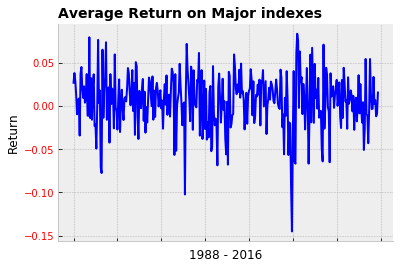

In [14]:
plt.style.use('bmh')

fig, ax = plt.subplots()
trend.plot(ax=ax,kind='line', color=['blue','magenta'],)
ax.set_title('Average Return on Major indexes', fontsize=14, loc='left',fontweight = "bold")
ax.set_ylabel('Return')
ax.set_xlabel('1988 - 2016')
ax.tick_params(labelcolor='red') 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [15]:
print('The lowest return is', trend.min())
print('It is on', trend.idxmin())

The lowest return is -0.14513986259999997
It is on 10/31/2008


We immediately note that some months are highly volatile compared to other months. In fact, we see that October 2008 had the lowest return of our entire data set. Perhaps corresponding to a certain financial crisis?

## Portfolio Selection

However, for the purposes of our project, we assume that the average, risk-averse investor wants to invest in developed markets (developing markets might have too much risk inherent in them). As such, we define our set of risky assets for the analysis as MSCI EUROPE, MSCI USA, and MSCI PACIFIC. Additionally, while the US 10 Year Treasury Bond is backed by the US government, the 10 year time horizon is very long for the average investor, who could face significant liquidity risk locking his capital in for this duration of time. We will also include this as a risky asset. The US 90 Day Treasury Bill will be our baseline for what constitutes a riskless asset, which is a common assumption found in finance.

In [16]:
RiskyAsset     =["MSCI EUROPE","MSCI USA","MSCI PACIFIC","TREASURY.BOND.10Y"]
RiskFreeAsset  = "TREASURY.BILL.90D"

In [17]:
# print out first 3 rows and all columns of risky assets
indata.loc[0:2,RiskyAsset] 

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,TREASURY.BOND.10Y
0,-0.040626,0.042834,0.049747,0.044235
1,0.059266,0.041869,0.070676,0.013917
2,0.027948,-0.033456,0.078041,-0.019930


# <span style="color:blue">Analyzing the Risky Assets: Return vs. Risk</span>

First, same basic stastical calculations. We examine the mean, median, standard deviations, skew, and kurtosis of our risky assets.

In [18]:
table={'mean':indata[RiskyAsset].mean(),
      'median':indata[RiskyAsset].median(),
      'standard Deviation':indata[RiskyAsset].std(),
       'Skew':indata[RiskyAsset].std(),
       'Kurtosis':indata[RiskyAsset].kurtosis()}
pd.DataFrame(table)

,Kurtosis,Skew,mean,median,standard Deviation
MSCI EUROPE,1.274753,0.049996,0.007798,0.010439,0.049996
MSCI USA,1.218349,0.041358,0.009155,0.012908,0.041358
MSCI PACIFIC,0.874957,0.055957,0.003608,0.001994,0.055957
TREASURY.BOND.10Y,0.839616,0.019887,0.005627,0.005221,0.019887


Skewness describes asymmetry from the normal distribution in a set of statistical data. The idea is to invest in a company with a long tail, which in the equity markets is a stock price that is greatly skewed positively, such as "MSCI PACIFIC". 

Kurtosis refers to the degree of peak in a distribution. More peak than normal (leptokurtic) means that a distribution also has fatter tails and that there are more chances of extreme outcomes compared to a normal distribution. Thus we may assume that "MSCI EUROPE" has a higher chance of producing extreme outcomes than the others.

## The Return Risk Ratio

In Portfolio Management theory, the return-risk ratio is an important metric for measuring how much return an investment generates, compared to its level of risk. The formula is the asset's mean divided by its standard deviation. We calculate this:

In [19]:
rr_ratio=indata[RiskyAsset].mean()/indata[RiskyAsset].std()
rr_ratio

MSCI EUROPE          0.155978
MSCI USA             0.221373
MSCI PACIFIC         0.064470
TREASURY.BOND.10Y    0.282970
dtype: float64

Graphically visualized:

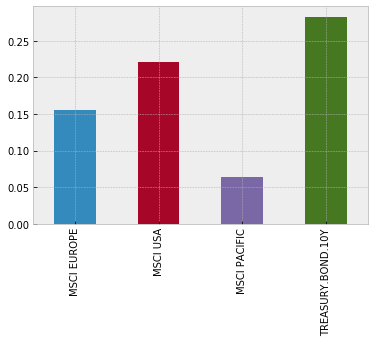

In [42]:
rr_ratio.plot.bar()

Out of the four risky assets, the MSCI USA gives the highest monthly expected return while the MSCI PACIFIC gives the lowest. To our surprise, MSCI PACIFIC also has the highest risk, which makes it probably the least attractive asset to invest considering its low return and high risk. This is illustrated on the bar plot with 'MSCI PACIFIC' giving the lowest return-risk ratio. The Treasury bond, which is always a relatively safe asset, has the lowest risk, which makes its return-risk ratio to be high. 


## <span style="color:blue"> Examining Risky and Riskless Asset Distributions </span>
We plot the distributions for each asset class, finding out the number of months an asset gives a certain return. Our goal is to see if any assets have abnormal distributions that deviate from the standard "Bell Curve". 

Text(0,0.5,'Number of Months')

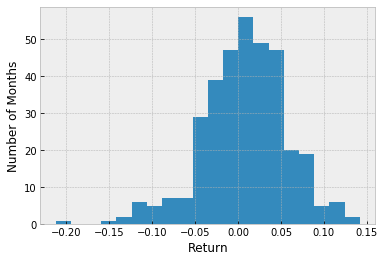

In [21]:
indata["MSCI EUROPE"].plot.hist(stacked=True, bins=20)
plt.xlabel ('Return')
plt.ylabel('Number of Months')

Text(0,0.5,'Number of Months')

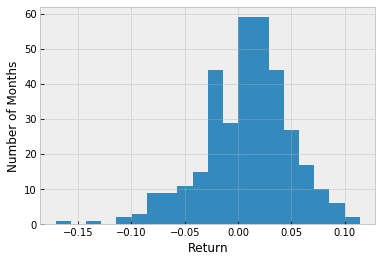

In [46]:
indata["MSCI USA"].plot.hist(stacked=True, bins=20)
plt.xlabel ('Return')
plt.ylabel('Number of Months')

Text(0,0.5,'Number of Months')

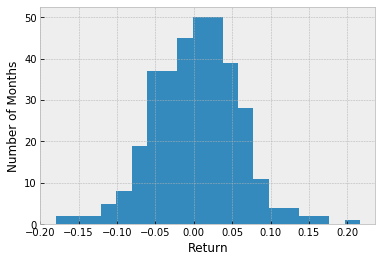

In [23]:
indata["MSCI PACIFIC"].plot.hist(stacked=True, bins=20)
plt.xlabel ('Return')
plt.ylabel('Number of Months')

Text(0,0.5,'Number of Months')

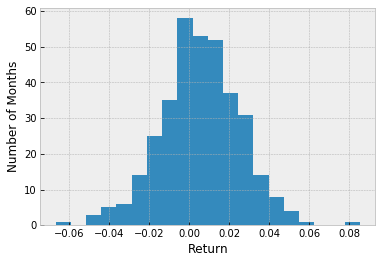

In [24]:
indata["TREASURY.BOND.10Y"].plot.hist(stacked=True, bins=20)
plt.xlabel ('Return')
plt.ylabel('Number of Months')

Text(0,0.5,'Number of Months')

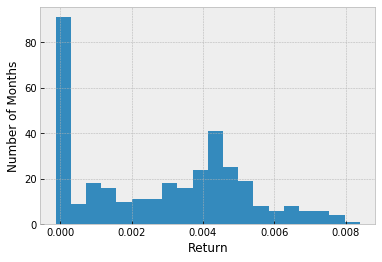

In [25]:
indata["TREASURY.BILL.90D"].plot.hist(stacked=True, bins=20)
plt.xlabel ('Return')
plt.ylabel('Number of Months')

All risky asset distributions resemble normal distributions, despite some outliers. This coincides with the low skewness and kurtosis we found in part one. The first three asset classes are clearly positively skewed, showing a sign of good investment. 

Interestingly, we note that our riskless asset, the US Treasury 90 Day Bill, has a large number of months that returned 0%. This is in line with the low-risk, low-return profile that makes this asset riskless. 

# <span style="color:blue"> Building the "Best" Portfolio</span>

Now that we have analyze our individual risky assets, we set out to find what combination of assets build the "best" portfolio. 

## The Minimum Variance Portfolio

A minimum variance portfolio indicates a well-diversified portfolio that consists of individually risky assets, which are hedged when traded together, resulting in the lowest possible risk for the rate of expected return. Its formula is:

In [53]:
%%html
<img src="https://github.com/yl4566/Fall-2018-Data-Bootcamp-Final-Project---Richard-Yang/blob/master/MVP%20Formula.gif?raw=true">

As seen in the formula above, we need to figure out our assets' covariance and correlation in order to compute the minimum variance portfolio. Additionally, our covariance matrix must be non-singular (have non-zero determinants), symmetric, and postive definite for the formula to work. 

First, we calculate our assets' covariance matrix. Covariance is a measure indicating the extent to which two assets change in tandem.

In [27]:
indata[RiskyAsset].cov(min_periods=None)

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,TREASURY.BOND.10Y
MSCI EUROPE,0.002500,0.001616,0.001813,-0.000097
MSCI USA,0.001616,0.001710,0.001247,-0.000039
MSCI PACIFIC,0.001813,0.001247,0.003131,-0.000035
TREASURY.BOND.10Y,-0.000097,-0.000039,-0.000035,0.000395


Next, we calculate our assets' correlation matrix. Correlation is a statistical measure that tells us how strongly two assets are related. It is a scaled version of covariance. 

In [28]:
indata[RiskyAsset].corr(min_periods=None)

,MSCI EUROPE,MSCI USA,MSCI PACIFIC,TREASURY.BOND.10Y
MSCI EUROPE,1.000000,0.781742,0.647950,-0.097888
MSCI USA,0.781742,1.000000,0.538701,-0.047390
MSCI PACIFIC,0.647950,0.538701,1.000000,-0.031418
TREASURY.BOND.10Y,-0.097888,-0.047390,-0.031418,1.000000


We then verify that our assets' covariance matrix is non-singular. It must have non-zero determinants. 

In [29]:
a=indata[RiskyAsset].cov(min_periods=None)
np.linalg.det(a)
if np.linalg.det(a)==0:
    print('Covariance Matrix is singular')
else: 
    print('Covariance Matrix is non-singular')

Covariance Matrix is non-singular


Lastly, we confirm that the covariance matrix is symmetric and positive definite. 

In [30]:
b=np.transpose(a)
print (np.subtract(a,b))

                   MSCI EUROPE  MSCI USA  MSCI PACIFIC  TREASURY.BOND.10Y
MSCI EUROPE                0.0       0.0           0.0                0.0
MSCI USA                   0.0       0.0           0.0                0.0
MSCI PACIFIC               0.0       0.0           0.0                0.0
TREASURY.BOND.10Y          0.0       0.0           0.0                0.0


In [31]:
def is_pos_def(a):
   return np.all(np.linalg.eigvals(a)>0)
print(np.all(np.linalg.eigvals(a)>0))

True


# <span style="color:blue"> Calculating Portfolios </span>
 

Now that we have found our risky assets' covariances and correlations, we can input this into our minimum variance portfolio and calculate it. 

Out of all the possible portfolio combinations to be constructed with our risky assets, the Global Minimum Variance Portfolio is the one with the lowest variance (risk). It is represented by the red dot below (the percentages below are irrelevant). 

In [32]:
%%html
<img src="https://breakingdownfinance.com/wp-content/uploads/2016/07/minimum-variance-portflio.png">

In [33]:
Deno_MVP=np.matmul(np.ones((1,4)),np.linalg.inv(a))
Nume_MVP=np.matmul(np.ones((1,4)),np.matmul(np.linalg.inv(a),np.ones((4,1))))    
Weight_MVP=Deno_MVP/Nume_MVP
print('The Portfolio Weights are',Weight_MVP)
Return_MVP=np.matmul(Weight_MVP,np.transpose(indata[RiskyAsset].mean()))
print('The monthly return of the portfolio is',Return_MVP)
squarerisk_MVP=np.matmul(Weight_MVP,np.matmul(a,Weight_MVP.T))
Risk_MVP=np.sqrt(squarerisk_MVP)
print('The risk of the portfolio is',Risk_MVP)

The Portfolio Weights are [[0.05030877 0.12979729 0.02500862 0.79488532]]
The monthly return of the portfolio is [0.00614397]
The risk of the portfolio is [[0.0174221]]


Interpreting these results, we note that our minimum variance portfolio is made up of 5% MSCI Europe, 12% MSCI USA, 2.5% MSCI Pacific, and 79.5% the US 10 Year Treasury Bond. We note the significant concentration of the US Bond, and this makes sense -- even though we consider it a "risky" asset due to investor liqudity risk, it is still backed by the US government, and helps to contribute to this portfolio's low risk at a higher proportion than the other assets. 

Let's compare this to our risk-free asset

In [34]:
print(indata[RiskFreeAsset].mean())
print(indata[RiskFreeAsset].std())

0.0028150143678160908
0.0022528699780771863


We find that our risky asset portfolio has an expected monthly return of 6.14% and a risk of 1.7%, while our risk-free asset has an expected monthly return of 2.8% and a risk of 0.2% (virtually risk-free). This is in line with our expectations, and again we note: higher risk is compensated with higher returns. If an investor chose to invest in the risk-free asset, he would have very little to worry about, but his expected returns would also be lower. 

## Calculating Portfolio Weights Given A Specified Expected Return

 Let us reverse our calculations to find the optimal portfolio composition given a specific expected return. Suppose that an investor demands to have a portfolio that gives an expected annual return of 11% with as little risk as possible.

In [35]:
m=indata[RiskyAsset].mean()
InC=np.linalg.inv(a)
M=np.matrix([[np.matmul(m,np.matmul(InC,m.T)),np.matmul(np.ones((1,4)),np.matmul(InC,m.T))],
             [np.matmul(m,np.matmul(InC,np.ones((4,1)))),np.matmul(np.ones((1,4)),np.matmul(InC,np.ones((4,1))))]])
Lam=2*np.linalg.inv(M)*np.matrix([[0.11/12],[1]])
Weight1=(Lam.item(0,0)*np.matmul(m,InC)+Lam.item(1,0)*np.matmul(np.ones((1,4)),InC))/2
print('The Portfolio Weights are',Weight1)
Return1=0.11/12
print('The monthly return of the portfolio is', Return1)
squarerisk1=np.matmul(Weight1,np.matmul(a,Weight1.T))
Risk1=np.sqrt(squarerisk1)
print('The risk of the portfolio is', Risk1)

The Portfolio Weights are [[ 0.07229895  0.73773344 -0.38596315  0.57593077]]
The monthly return of the portfolio is 0.009166666666666667
The risk of the portfolio is [[0.02961807]]


We note that, with the investor's specified return, there is a risk of 3% associated with this portfolio. Additionally, an interesting aspect is that the portfolio weight of the MSCI Pacific is negative, which means that the portfolio manager would have to short this asset to achieve the specified return. 

More broadly, we can create a function that lets us determine the weights, monthly return, and risk of the optimal portfolio, given an investor's specified expected return demand. 

This becomes the minimum variance frontier: the set of optimal portfolios that offers the lowest risk for a given level of expected return. 

In [36]:
def WeightReturnRisk(investor_specified_return):
    simple=np.matrix([[investor_specified_return/12],[1]])
    Lam2=2*np.matmul(np.linalg.inv(M),np.matrix([[investor_specified_return/12],[1]]))
    Weight2=(Lam2.item(0,0)*np.matmul(m,InC)+Lam2.item(1,0)*np.matmul(np.ones((1,4)),InC))/2
    print('The Portfolio Weights are',Weight2)
    Return2=investor_specified_return/12
    print('The monthly return of the portfolio is', Return2)
    squarerisk2=np.matmul(Weight2,np.matmul(a,Weight2.T))
    Risk2=np.sqrt(squarerisk2)
    print('The risk of the portfolio is', Risk2)
    plt.plot(Risk2,investor_specified_return/12,'k.')

We input different levels of expected return into our function, and compare it graphically with the minimum variance portfolio (depicted as a blue triangle), and a portfolio equally weighted with all 4 risky assets (red star). 


     To construct a minimum-risk portfolio with expected return of 0.2:
The Portfolio Weights are [[ 0.12686169  2.2461642  -1.40567955  0.03265367]]
The monthly return of the portfolio is 0.016666666666666666
The risk of the portfolio is [[0.08518331]]

     To construct a minimum-risk portfolio with expected return of 0.19:
The Portfolio Weights are [[ 0.12079916  2.07856078 -1.29237773  0.09301779]]
The monthly return of the portfolio is 0.015833333333333335
The risk of the portfolio is [[0.07873108]]

     To construct a minimum-risk portfolio with expected return of 0.18:
The Portfolio Weights are [[ 0.11473663  1.91095736 -1.17907591  0.15338191]]
The monthly return of the portfolio is 0.015
The risk of the portfolio is [[0.07230615]]

     To construct a minimum-risk portfolio with expected return of 0.17:
The Portfolio Weights are [[ 0.10867411  1.74335394 -1.06577409  0.21374603]]
The monthly return of the portfolio is 0.014166666666666668
The risk of the portfolio is [[0.065

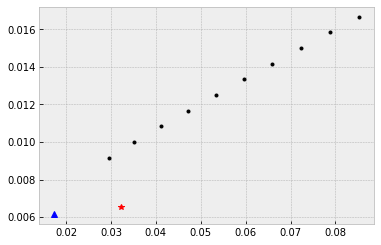

In [37]:
print('''
     To construct a minimum-risk portfolio with expected return of 0.2:''')
WeightReturnRisk(0.2)

print('''
     To construct a minimum-risk portfolio with expected return of 0.19:''')
WeightReturnRisk(0.19)

print('''
     To construct a minimum-risk portfolio with expected return of 0.18:''')
WeightReturnRisk(0.18)

print('''
     To construct a minimum-risk portfolio with expected return of 0.17:''')
WeightReturnRisk(0.17)

print('''
     To construct a minimum-risk portfolio with expected return of 0.16:''')
WeightReturnRisk(0.16)

print('''
     To construct a minimum-risk portfolio with expected return of 0.15:''')
WeightReturnRisk(0.15)

print('''
     To construct a minimum-risk portfolio with expected return of 0.14:''')
WeightReturnRisk(0.14)

print('''
     To construct a minimum-risk portfolio with expected return of 0.13:''')
WeightReturnRisk(0.13)

print('''
     To construct a minimum-risk portfolio with expected return of 0.12:''')
WeightReturnRisk(0.12)

print('''
     To construct a minimum-risk portfolio with expected return of 0.11:''')
WeightReturnRisk(0.11)

plt.plot(Risk_MVP,Return_MVP,'b^')

Weight3=np.matrix([[0.25,0.25,0.25,0.25]])
Return3=np.matmul(Weight3,np.transpose(indata[RiskyAsset].mean()))
squarerisk3=np.matmul(Weight3,np.matmul(a,Weight3.T))
Risk3=np.sqrt(squarerisk3)
plt.plot(Risk3, Return3,'r*')
                
plt.show()



The blue triangle, the minimum variance portfolio, marks the beginning of our minimum variance frontier, which continues along the black dots. We can immediately see that an equally weight portfolio, the red star, falls below the minimum variance frontier and is not an optimal portfolio mix for the given level of return. That is, an investor could select a more optimal portfolio mix and generate a monthly return of 0.9% instead of 0.65%, with the same level of risk!

## <span style="color:blue">Calculating Beta

Finally, we calculate the Beta of each of our risky assets, relative to 2 market portfolios. Beta is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole. A beta of 1 indicates that the security's price moves with the market. A beta of less than 1 means that the security is theoretically less volatile than the market. A beta of greater than 1 indicates that the security's price is theoretically more volatile than the market.

We use MSCI AC World and MSCI USA as our two "market portfolios", which represent the returns of entire markets. 

In [38]:
R=indata["TREASURY.BILL.90D"].mean()
wM_T=m-R
ac_World=indata["MSCI AC WORLD"].mean()
wM_B=ac_World-R
wM=wM_T/wM_B
usa_World=indata["MSCI USA"].mean()
wM_B2=usa_World-R
wM2=wM_T/wM_B2
n={"MSCI AC WORLD Beta":wM,
  "MSCI USA Beta":wM2}
pd.DataFrame(n)

,MSCI AC WORLD Beta,MSCI USA Beta
MSCI EUROPE,1.187019,0.785945
MSCI USA,1.510308,1.000000
MSCI PACIFIC,0.188788,0.124999
TREASURY.BOND.10Y,0.669897,0.443550


MSCI USA obviously has a beta of 1 compared to itself, since it is moving with itself. We note that MSCI Europe is less volatile than MSCI USA and more volative than MSCI AC WORLD. MSCI Pacific and the US 10 Year Treasury Bond are less volatile than both market portfolios -- that is to say that they move less in correlation with the market, and are less risky assets. 

# Results & Concluding Remarks

Through our investigation, we come to a clear conclusion: there are definitely combinations of portfolios that allow investors to generate higher expected returns than they might otherwise obtain from investing in a single asset. However, there is no such thing as a "best" portfolio. What we do find is that a "minimum variance frontier" exists, a series of "best" portfolios that generate the highest returns given a specific level of risk. However, there are definitely sub-optimal portfolio combinations, for which a better portfolio (asset weight) combination could generate higher returns, for the same level of risk!  

Risk should absolutely be taken into acount in consdering the optimal investment mix. An investor who is not astute may only look at investment returns, and create a portfolio of assets that generate the highest returns. However, he completely disregards the risk profiles of his assets, and may risk losing capital! This is not to say that higher risk is bad-- in fact, assets with higher risk should have higher expected returns to compensate the investor for this risk.  

To summarize, portfolio management should be based on the risk profile and goals of each individual investor. For those who are extremely risk-averse, perhaps only investing in the US Treasury Bond IS the right decision. For those who are more risk-neutral or risk-seeking, they must require higher returns in compensation. 

### Github Link

https://github.com/yl4566/Fall-2018-Data-Bootcamp-Final-Project---Richard-Yang